# 자막 자동 생성하기

## Step 1. 음성 인식하기

API, 또는 파이썬 라이브러리를 사용해 음성을 인식해보자.

### 1) SpeechRecognition 라이브러리 사용

In [3]:
import speech_recognition as sr
sr.__version__

'3.8.1'

In [5]:
#SpeechRecognition의 모든 작업은 Recognizer클래스에서 일어난다. 
#인스턴스 생성
r = sr.Recognizer()

#recognize_*()메소드의 인수로 AudioData 인스턴스가 필요하므로 
#AudioFile 클래스로 변환
harvard = sr.AudioFile('audio/harvard.wav')
with harvard as source:
    audio = r.record(source)

type(audio)

speech_recognition.AudioData

In [6]:
r.recognize_google(audio)

'the stale smell of old beer lingers it takes heat to bring out the odor a cold dip restores health and zest a salt pickle taste fine with ham tacos al Pastore are my favorite a zestful food is be hot cross bun'

한글 파일로 실행시키기 위해 .m4a파일로 녹음했으나,
위에서 사용한 예제는 .wav파일만 AudioData인스턴스로 받아 파일을 변환해야 한다.

언젠가는 파이썬코드로 변환하자. 지금은 한글예제를 얼마나 잘 인식하는지 보기 위해 타 응용소프트웨어를 사용했다.

In [8]:
kor = sr.AudioFile('audio/kor_ex1.wav')
with kor as source:
    audio = r.record(source)

type(audio)

speech_recognition.AudioData

In [10]:
strized = r.recognize_google(audio, language='ko_KR')
print('결과: '+ strized)

결과: 매일 두유는 식물성 단백질을 포함한 설탕 무첨가 식품이다


### 2) 카카오 음성 인식 API
https://speech-api.kakao.com/
### 3) Clova 음성 인식 API
https://developers.naver.com/products/clova/vrecog/

## Step 2. 음성 분석하기

Librosa library를 활용해 음성을 분석한다.

음성 분석의 목적은 전체 오디오 파일에서 실제로 음성이 나오는 구간만 파악하는 것이다.

In [5]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

FIG_SIZE = (15, 10)

In [12]:
#file = "audio/blues.00000.wav"
file = "audio/kor_ex1.wav"

#load audio file with librosa
sig, sr = librosa.load(file, sr=22050)

print(sig, sig.shape)

[-7.8603434e-06 -3.6537771e-05 -6.5842585e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] (172637,)


sr은 sample rate를 의미함.

sig.shape는 signal의 벡터를 출력한다 마지막 숫자는 signal이 몇개의 벡터로 이루어져 있는지를 알려준다.

### Waveform 시각화

Text(0.5, 1.0, 'Waveform')

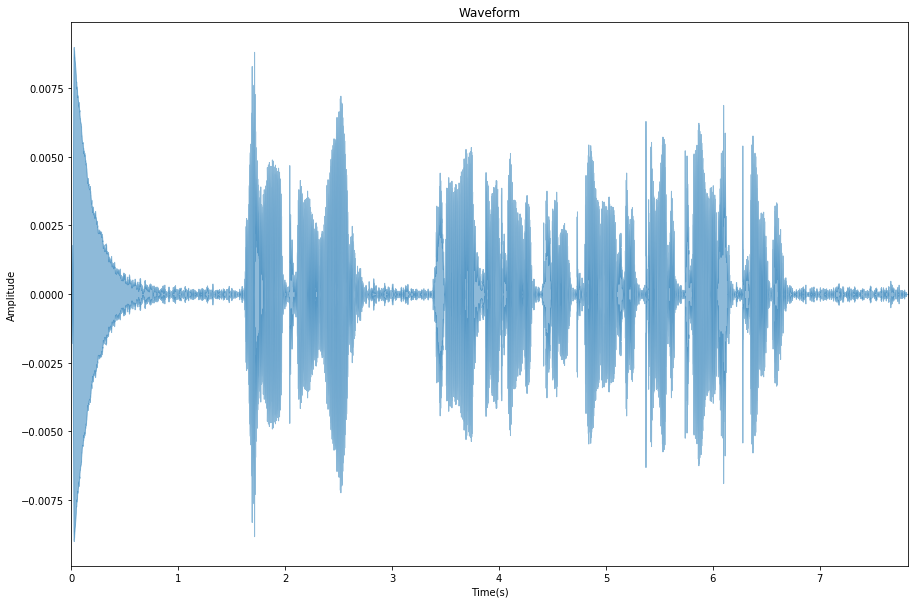

In [13]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(sig, sr, alpha=0.5)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

### 단순 푸리에 변환 → spectrum

Text(0.5, 1.0, 'Power spectrum')

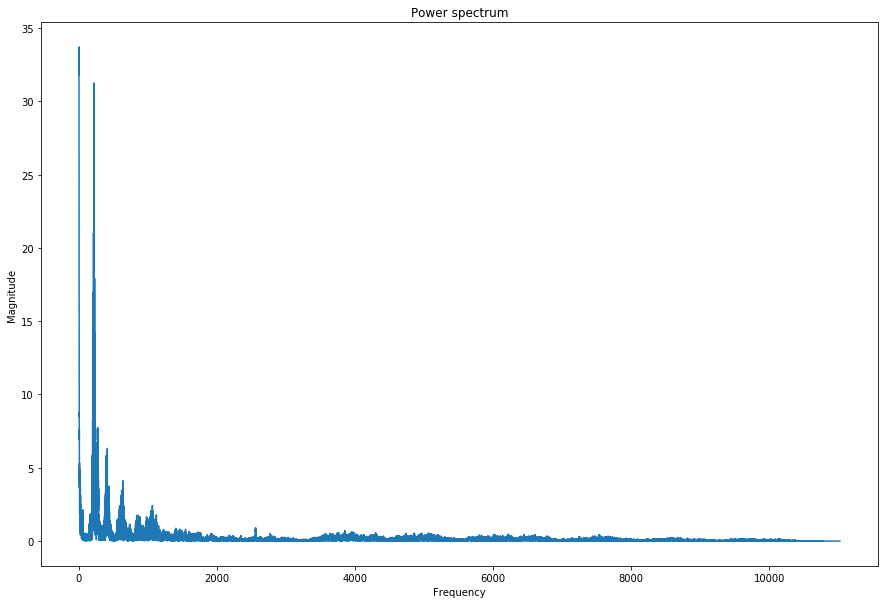

In [14]:
fft = np.fft.fft(sig)

#복소공간 값 절대값 취해서, magnitude 구하기
magnitude = np.abs(fft)

#Frequency 값 만들기
f = np.linspace(0, sr, len(magnitude))

#푸리에 변환을 통과한 spectrum은 대칭구조로 나와서 high frequency 부분 절반을 날리고 앞쪽 절반만 사용
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")